## Weight Decay

In [1]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

- Instead of optimizing for the minimum loss, we try to optimize for `Loss + (term dependent on w)`. Now if the term becomes very big, instead of reducing the loss, it will also try to reduce the $|w|$ $$L(w,b) + \frac{\lambda}{2}||w||^2$$

In [28]:
class Data(d2l.DataModule):
    def __init__(self, num_train, num_val, num_inputs, batch_size):
        self.save_hyperparameters()
        n = num_train + num_val
        self.X = torch.randn((n, num_inputs))
        noise = torch.randn(n,1) * 0.01
        w,b = torch.ones((num_inputs, 1)) * 0.01, 0.05
        self.y = self.X@w + b + noise

    def get_dataloader(self, train):
        i = slice(0, self.num_train) if train else slice(self.num_train, None)
        return self.get_tensorloader([self.X, self.y], train, i)

In [29]:
torch.randn(2,3).shape

torch.Size([2, 3])

In [30]:
def l2_penalty(w):
    return (w ** 2).sum() / 2

In [40]:
class WeightDecayScratch(d2l.LinearRegressionScratch):
    def __init__(self, num_inputs, lambd, lr, sigma=0.01):
        super().__init__(num_inputs, lr, sigma)
        self.save_hyperparameters()

    def loss(self, y_hat, y):
        return (super().loss(y_hat, y) + self.lambd * l2_penalty(self.w))

In [43]:
data = Data(num_train=20, num_val=100, num_inputs=200, batch_size=5)
trainer = d2l.Trainer(max_epochs=10)

def train_scratch(lambd):
    model = WeightDecayScratch(num_inputs=200, lambd=lambd, lr=1e-2)
    model.board.yscale='log'
    trainer.fit(model, data)
    print('L2 norm of w:', float(l2_penalty(model.w)))

L2 norm of w: 0.008873146027326584


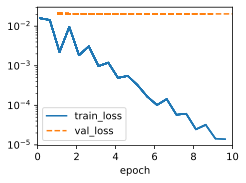

In [44]:
train_scratch(0)